# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [ ]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

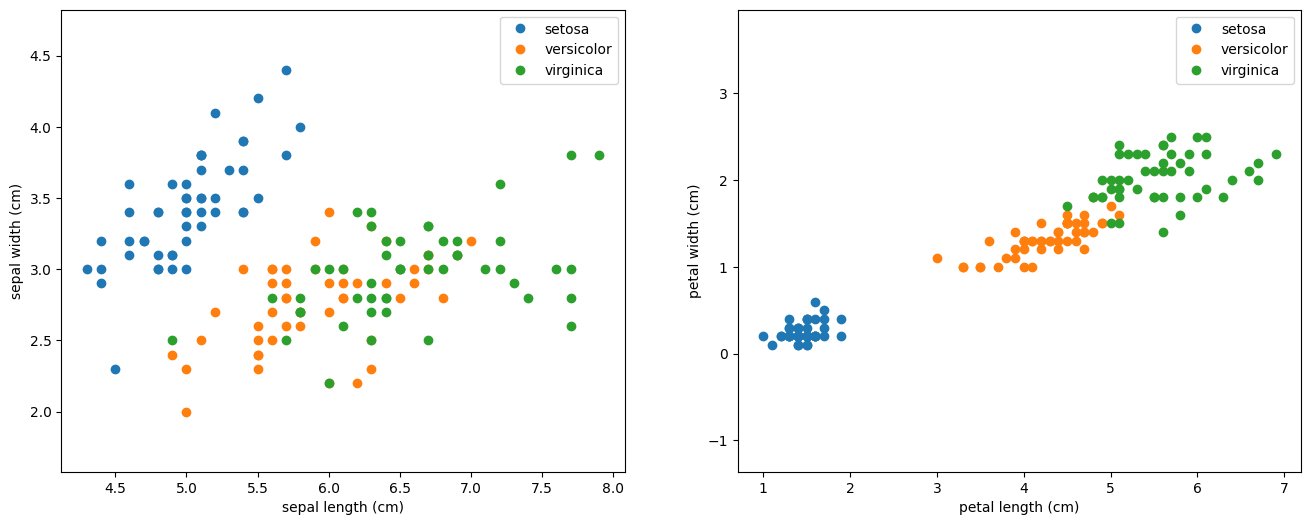

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3], 
             linestyle='none', 
             marker='o', 
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [ ]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [ ]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 186.21it/s]


# Plot training progress

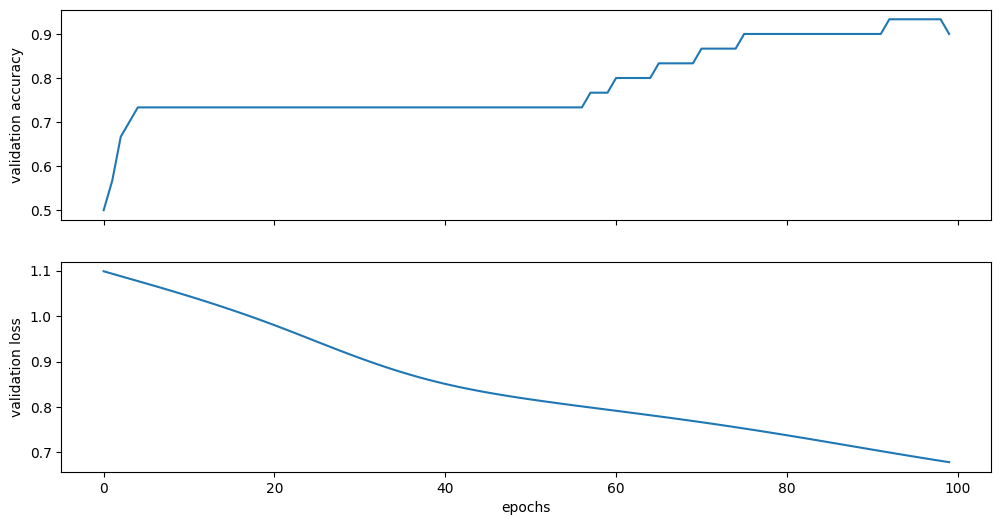

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

#ANSWERS

1) By changing the number of hidden layers in the MLP classifier. This will demonstrate how the number of hidden layers can affect the model's performance. 

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the inputs and corresponding outputs for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Experiment with different numbers of hidden layers
hidden_layer_sizes = [(2,), (4,), (6,)]

for size in hidden_layer_sizes:
    # Create an MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=size, activation='logistic', max_iter=1000)

    # Train the classifier
    clf.fit(X, y)

    # Predict output for new inputs
    test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = clf.predict(test_input)

    # Print the predictions and number of hidden layers
    print("Number of hidden layers:", len(size))
    print("Predictions:", predictions)
    print()


Number of hidden layers: 1
Predictions: [0 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of hidden layers: 1
Predictions: [0 0 0 0]

Number of hidden layers: 1
Predictions: [0 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


2)Changing the number of neurons in the hidden layer of an MLP can affect the model's capacity to learn complex patterns and can impact the accuracy of predictions. Increasing the number of neurons can allow the model to capture more intricate relationships in the data, while decreasing the number of neurons may result in a simpler model with reduced representation power. The optimal number of neurons depends on the specific problem and dataset, and it often requires experimentation to find the right balance between model complexity and performance.

In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the inputs and corresponding outputs for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Experiment with different numbers of neurons in the hidden layer
hidden_layer_sizes = [(2,), (4,), (6,)]

for size in hidden_layer_sizes:
    # Create an MLP classifier
    clf = MLPClassifier(hidden_layer_sizes=size, activation='logistic', max_iter=1000)

    # Train the classifier
    clf.fit(X, y)

    # Predict output for new inputs
    test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
    predictions = clf.predict(test_input)

    # Print the predictions and number of neurons in the hidden layer
    print("Number of neurons in the hidden layer:", size[0])
    print("Predictions:", predictions)
    print()


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons in the hidden layer: 2
Predictions: [0 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


Number of neurons in the hidden layer: 4
Predictions: [0 0 0 0]

Number of neurons in the hidden layer: 6
Predictions: [0 0 0 0]



/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


100%|██████████| 100/100 [00:00<00:00, 594.00it/s]


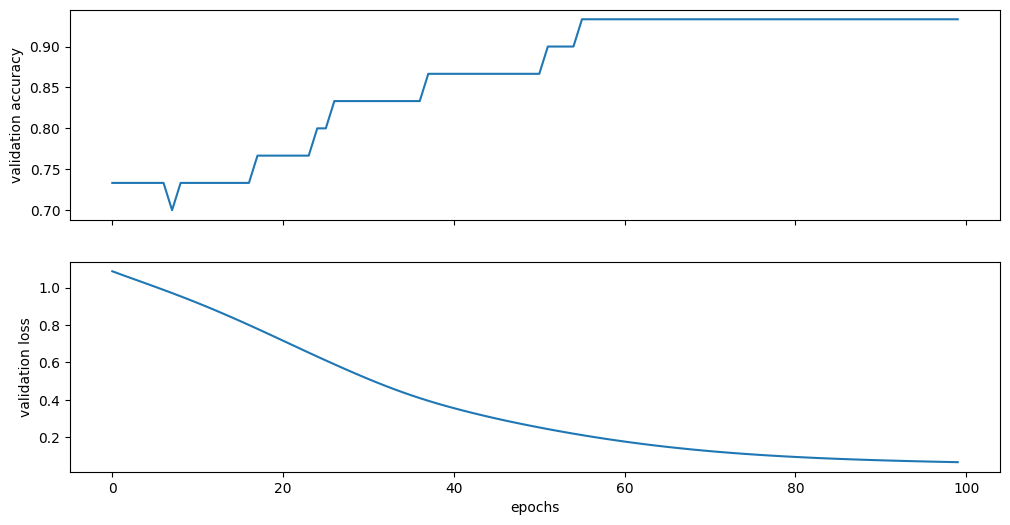

In [ ]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 100)
        self.layer2 = nn.Linear(100, 100)
        self.layer3 = nn.Linear(100, 3)
        
    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softplus(self.layer3(x))
        return x
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()
EPOCHS  = 100
#X_train = torch.from_numpy(X_train).float()
#X_test= torch.from_numpy(X_test).float()
#y_test = torch.from_numpy(y_test)
#y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()
    
    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

3) Changing the activation function in an MLP can affect the model's non-linearity, convergence, and ability to capture complex patterns. Choosing the right activation function depends on the problem and data characteristics.



In [ ]:
from sklearn.neural_network import MLPClassifier
import numpy as np

# Define the inputs and corresponding outputs for the AND gate
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

# Create an MLP classifier with ReLU activation function
clf = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', max_iter=1000)

# Train the classifier
clf.fit(X, y)

# Predict output for new inputs
test_input = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predictions = clf.predict(test_input)

# Print the predictions
print(predictions)


[0 0 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
